### ALP-induced Signal simulation


In [1]:
import os
import sys

print(os.path.abspath(os.curdir))
os.chdir("..")  # go to parent folder
os.chdir("src")  # go to /src folder
print(os.path.abspath(os.curdir))
sys.path.insert(0, os.path.abspath(os.curdir))

c:\Users\zhenf\D\Yu0702\Axion-NMR-simulator\Calibration-tests
c:\Users\zhenf\D\Yu0702\Axion-NMR-simulator\src


In [2]:
import numpy as np
import time
from SimuTools import Sample, MagField, Simulation
from functioncache import check

In [3]:
ExampleSample10MHzT = Sample(
    name="TestSample",  # name of the atom/molecule
    gyroratio=2
    * np.pi
    * (10)
    * 1e6,  # [Hz/T]. Remember input it like 2 * np.pi * 11.777*10**6
    numofnuclei=1,  #
    tempunit="K",  # temperature scale
    T2=1000,  # [s]
    T1=10000,  # [s]
    pol=1,
    verbose=False,
)

In [4]:
ALP_Field_grad = MagField(name="ALP field gradient")  # excitation field in the rotating frame

In [5]:
simu = Simulation(
    name="TestSample 10MHzT",
    sample=ExampleSample10MHzT,  # class Sample
    # gyroratio=(2*np.pi)*11.777*10**6,  # [Hz/T]
    init_time=0.0,  # [s]
    station=None,
    init_mag_amp=1.0,
    init_M_theta=0.0,  # [rad]
    init_M_phi=0.0,  # [rad]
    demodfreq=1e6,
    B0z=(1e6) / (ExampleSample10MHzT.gyroratio / (2 * np.pi)),  # [T]
    simuRate=(6696.42871094),  #
    duration=10,
    excField=ALP_Field_grad,
    verbose=False,
)

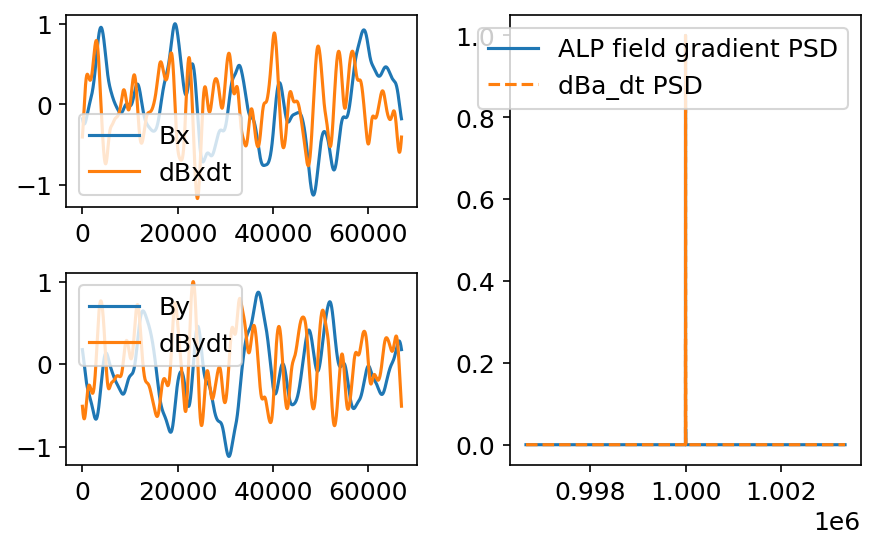

In [8]:
# check(simu.demodfreq)
simu.excField.setALP_Field(
    method="inverse-FFT",
    timeStamp=simu.timeStamp,
    Brms=1e-10,  # RMS amplitude of the pseudo-magnetic field in [T]
    nu_a=(-0.7),  # frequency in the rotating frame
    # direction: np.ndarray,  #  = np.array([1, 0, 0])
    use_stoch=True,
    demodfreq=simu.demodfreq,
    makeplot=True,
)
simu.excType = "ALP"

In [9]:
tic = time.perf_counter()
simu.GenerateTrajectory(verbose=False)
toc = time.perf_counter()
print(f"GenerateTrajectory time consumption = {toc-tic:.3f} s")

GenerateTrajectory time consumption = 0.043 s


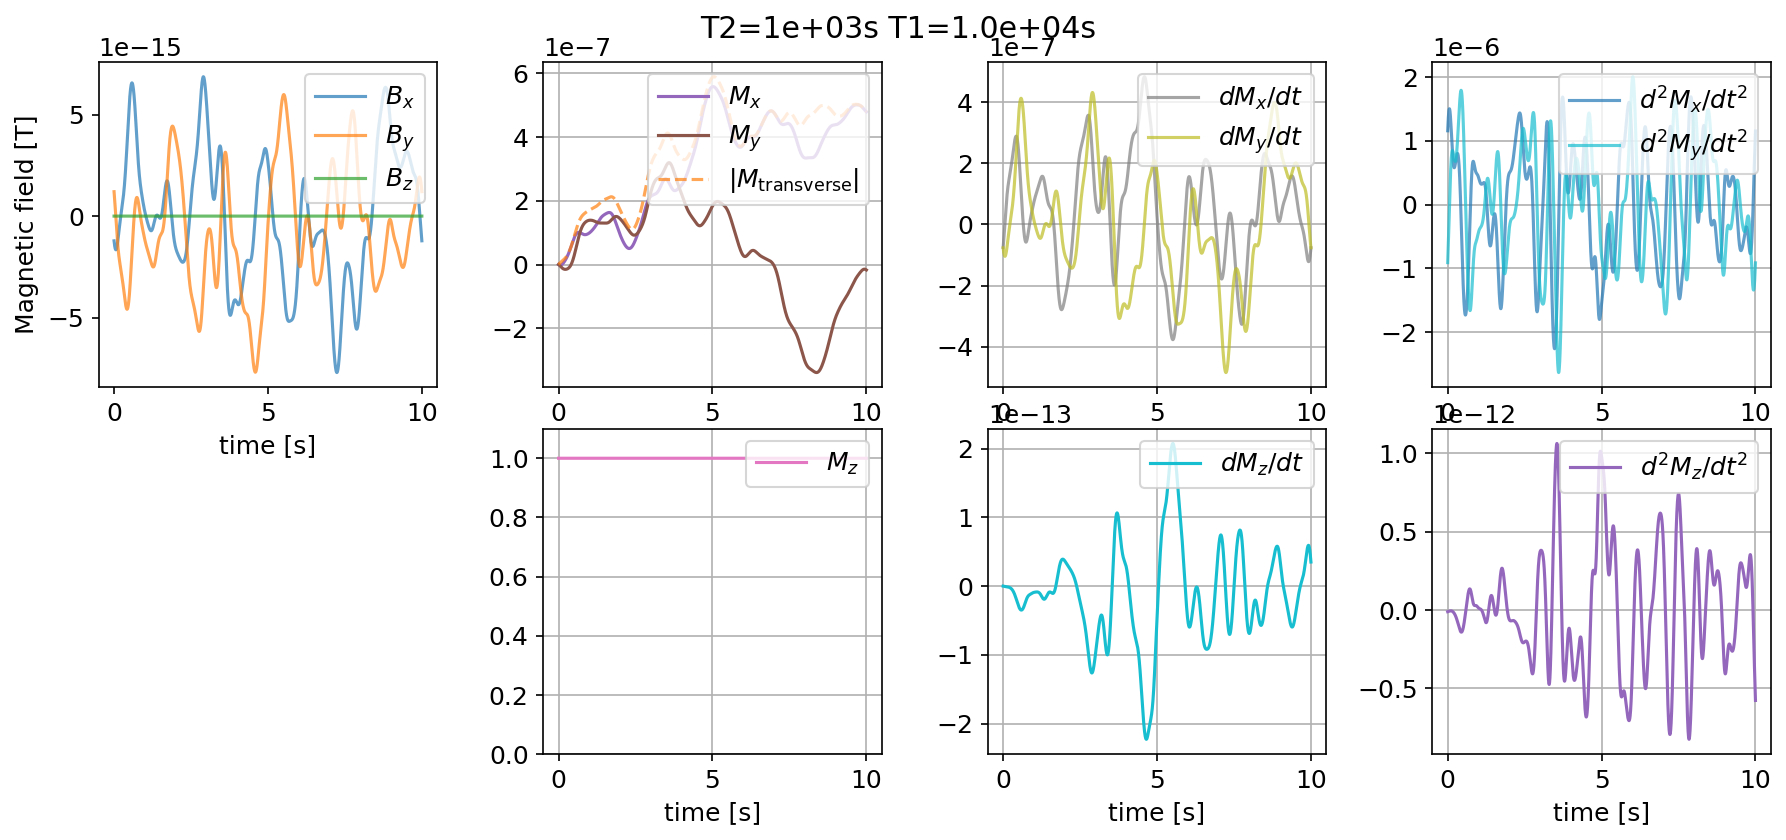

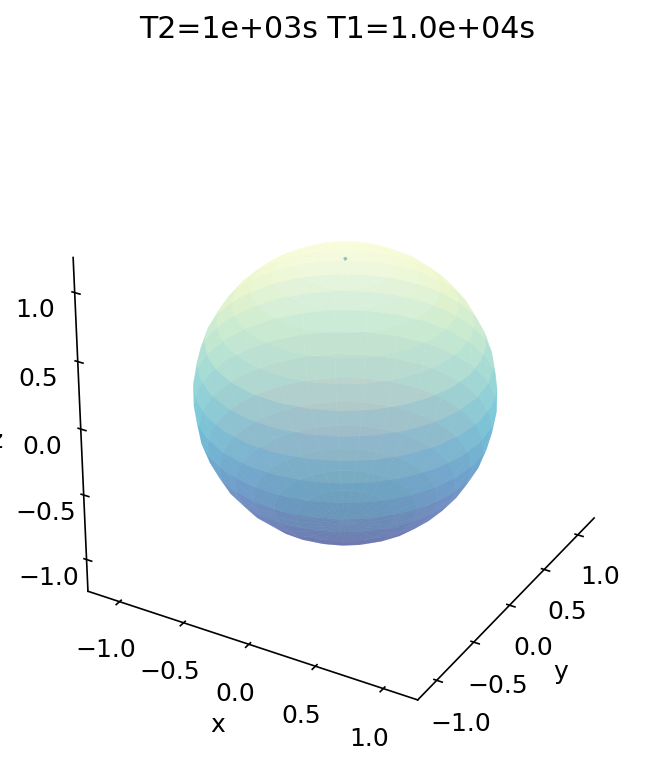

In [11]:
simu.MonitorTrajectory(verbose=True)
simu.VisualizeTrajectory3D(
    plotrate=1e3,  # [Hz]
    # rotframe=True,
    verbose=False,
)

<class 'DataAnalysis.DualChanSig'>
c:\Users\zhenf\D\Yu0702\Axion-NMR-simulator\src\SimuTools.py line 2366 self.trjryStream.popt[1] : float64(0.07589819043082037) [shape=()]
c:\Users\zhenf\D\Yu0702\Axion-NMR-simulator\src\SimuTools.py line 2367 self.trjryStream.popt[2] : float64(1.6082838531476536e-13) [shape=()]


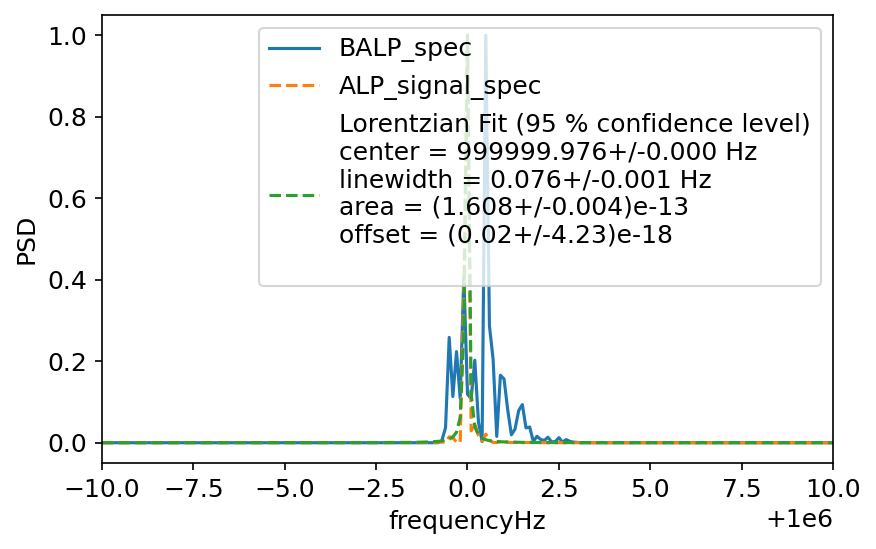

In [12]:
simu.compareBandSig()